# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read and explore dataset

In [2]:
df = pd.read_csv('homes_dist_rankings.csv')

In [3]:
df.head()

,Unnamed: 0,X,No.,MLSID,StreetNumberNumeric,streetaddress,STREETNAME,PostalCode,StateOrProvince,City,...,Three.Season.Porch,Unfinished,Utility.Room,Walk.In.Closet,Wine.Cellar,Work.Shop,ID,address_complete,Rank,grade_niche
0,1,1,1,RMLS,11511,11511 Stillwater Blvd N,Stillwater,55042,MN,Lake Elmo,...,0,0,0,0,0,0,1,"11511 Stillwater Blvd N, Lake Elmo, MN 55042",24,A-
1,2,2,2,RMLS,11200,11200 31st St N,31st,55042,MN,Lake Elmo,...,0,0,0,0,0,0,2,"11200 31st St N, Lake Elmo, MN 55042",24,A-
2,3,3,3,RMLS,8583,8583 Stillwater Blvd N,Stillwater,55042,MN,Lake Elmo,...,0,0,0,0,0,0,3,"8583 Stillwater Blvd N, Lake Elmo, MN 55042",125,B
3,4,4,4,RMLS,9350,9350 31st St N,31st,55042,MN,Lake Elmo,...,0,0,0,0,0,0,4,"9350 31st St N, Lake Elmo, MN 55042",24,A-
4,5,5,5,RMLS,2915,2915 Inwood Ave N,Inwood,55042,MN,Lake Elmo,...,0,0,0,0,0,0,5,"2915 Inwood Ave N, Lake Elmo, MN 55042",125,B


In [4]:
df.shape

(5000, 140)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 140 entries, Unnamed: 0 to grade_niche
dtypes: float64(6), int64(86), object(48)
memory usage: 5.3+ MB


In [6]:
df.columns.values

array(['Unnamed: 0', 'X', 'No.', 'MLSID', 'StreetNumberNumeric',
       'streetaddress', 'STREETNAME', 'PostalCode', 'StateOrProvince',
       'City', 'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE',
       'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE',
       'MapLetter', 'LotSizeDimensions', 'SchoolDistrictNumber',
       'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4',
       'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale',
       'PoolDescription', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND',
       'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS',
       'TAXYEAR', 'LivingArea', 'UNITNUMBER', 'YEARBUILT', 'ZONING',
       'STYLE', 'ACRES', 'CoolingDescription', 'APPLIANCES',
       'backonmarketdate', 'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR',
       'RoomFloor3', 'RoomFloor2', 'RoomArea2', 'DiningRoomDescription',
       'BASEMENT', 'BathsFull', 'BathsHalf', 'BATHQUARTER',
       'BATHSTHREEQUARTER', 'Class', 'BATHSTOTAL', 'BAT

## EDA

In [7]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/pandas_profiling/base.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/toniachu/Pr

Number of variables,140
Number of observations,5000
Total Missing (%),5.8%
Total size in memory,5.3 MiB
Average record size in memory,1.1 KiB
Numeric,87
Categorical,45
Date,0
Text (Unique),0
Rejected,8
Distinct count,570


# Feature Engineering

## Look at our dependent variable 'SalesClosePrice'

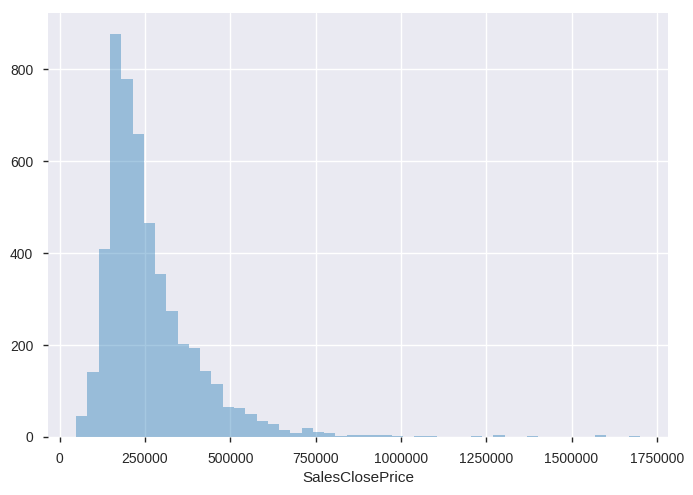

In [8]:
sns.distplot(df['SalesClosePrice'], kde=False)

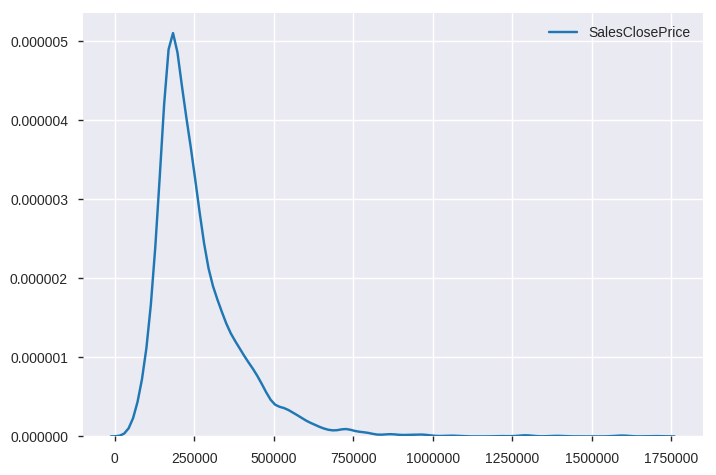

In [9]:
sns.kdeplot(df['SalesClosePrice'])

### log scale

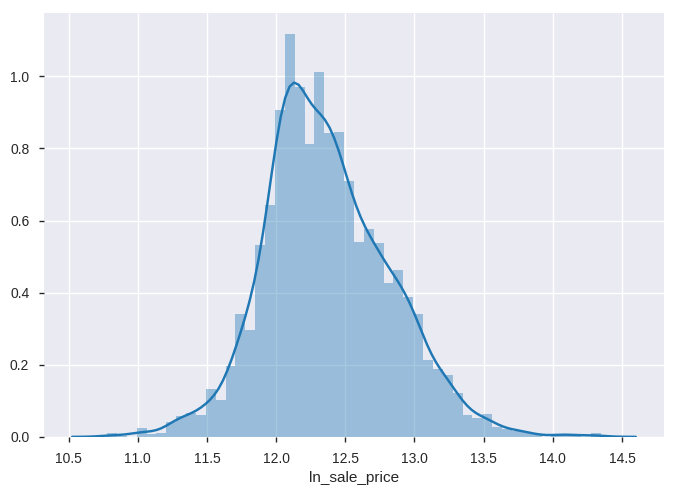

In [10]:
df['ln_sale_price'] = np.log(df['SalesClosePrice'])
sns.distplot(df['ln_sale_price'])

### Centering to be normal distribution

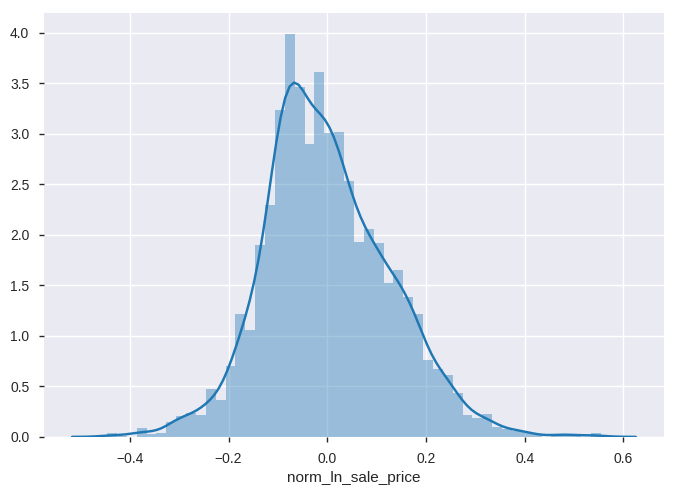

In [11]:
df['norm_ln_sale_price'] = (df['ln_sale_price'] - df['ln_sale_price'].mean()) / (df['ln_sale_price'].max() - df['ln_sale_price'].min())
sns.distplot(df['norm_ln_sale_price'])

## Second let's look at bathrooms

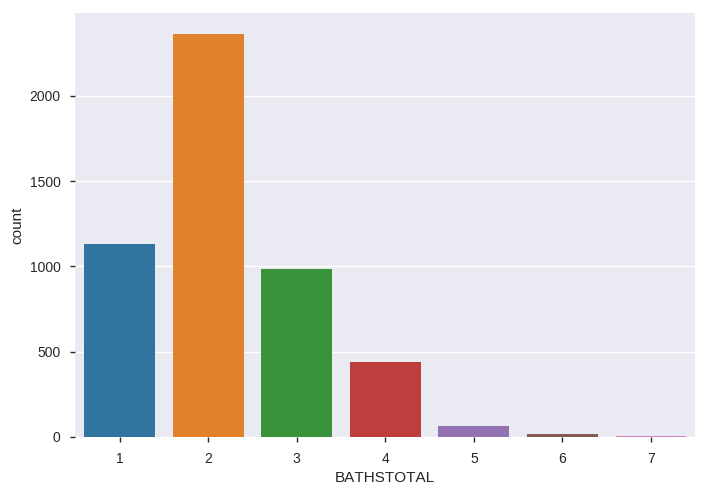

In [12]:
sns.countplot(x="BATHSTOTAL", data=df)

### Solve long tail by binning/bucketing

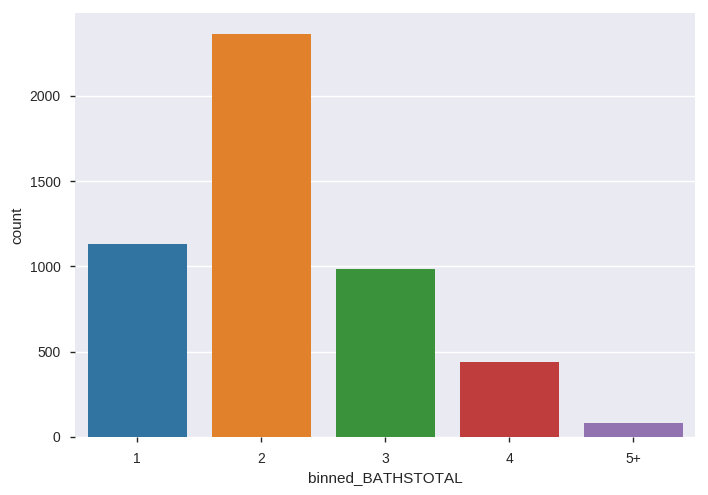

In [13]:
bins = [0, 1, 2, 3, 4, 100]
df['binned_BATHSTOTAL'] = pd.cut(df['BATHSTOTAL'], bins, labels=["1", "2", "3", "4", "5+"])
sns.countplot(df['binned_BATHSTOTAL'])

## Next let's look at school district ranking

In [14]:
df['SchoolDistrictNumber'].unique()

array(['834 - Stillwater', '622 - North St Paul-Maplewood',
       '832 - Mahtomedi', '6 - South St. Paul', '623 - Roseville',
       '624 - White Bear Lake', '625 - St. Paul',
       '833 - South Washington County'], dtype=object)

Text(0,0.5,'Counts')

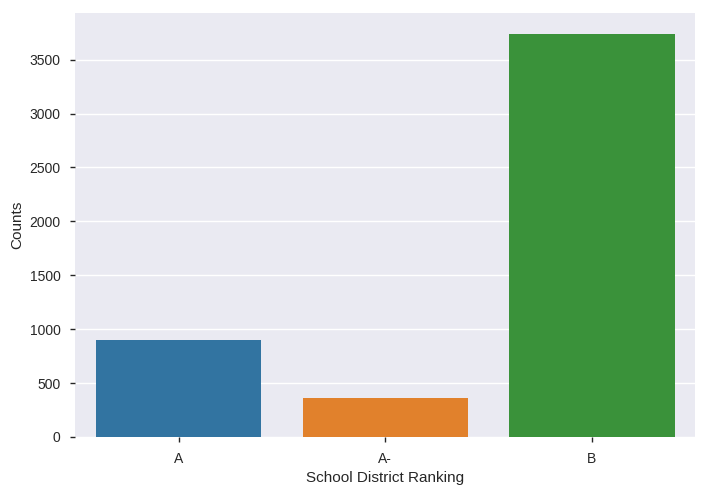

In [15]:
sns.countplot(x="grade_niche", data=df, order=['A', 'A-', 'B'])
plt.xlabel("School District Ranking")
plt.ylabel("Counts")

Text(0,0.5,'House Price')

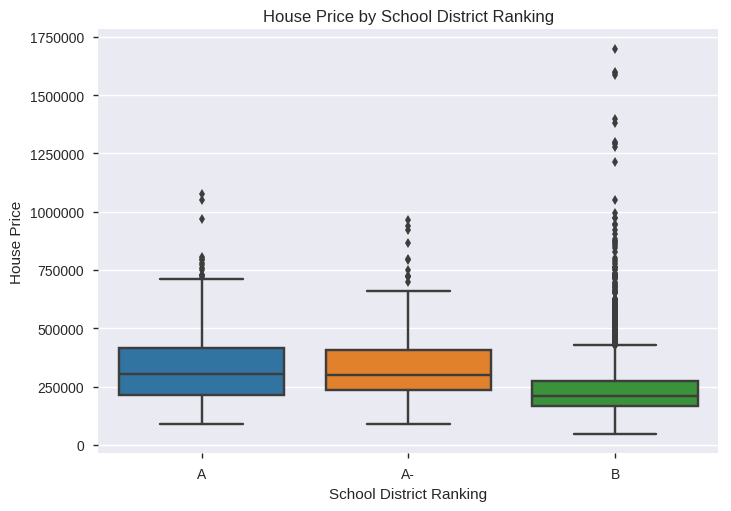

In [16]:
sns.boxplot(x='grade_niche', y='SalesClosePrice', data=df, order=['A', 'A-', 'B'])
plt.title("House Price by School District Ranking")
plt.xlabel("School District Ranking")
plt.ylabel("House Price")

Text(0,0.5,'House Price')

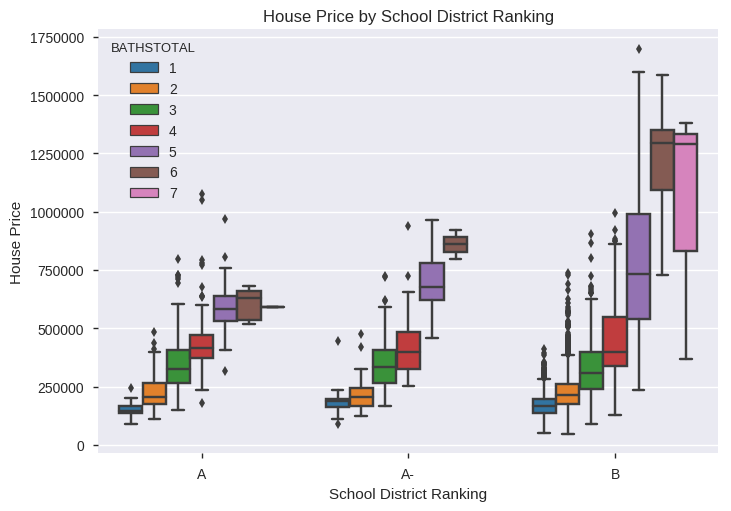

In [17]:
sns.boxplot(x='grade_niche', y='SalesClosePrice', hue='BATHSTOTAL', data=df, order=['A', 'A-', 'B'])
plt.title("House Price by School District Ranking")
plt.xlabel("School District Ranking")
plt.ylabel("House Price")

Text(0,0.5,'House Price')

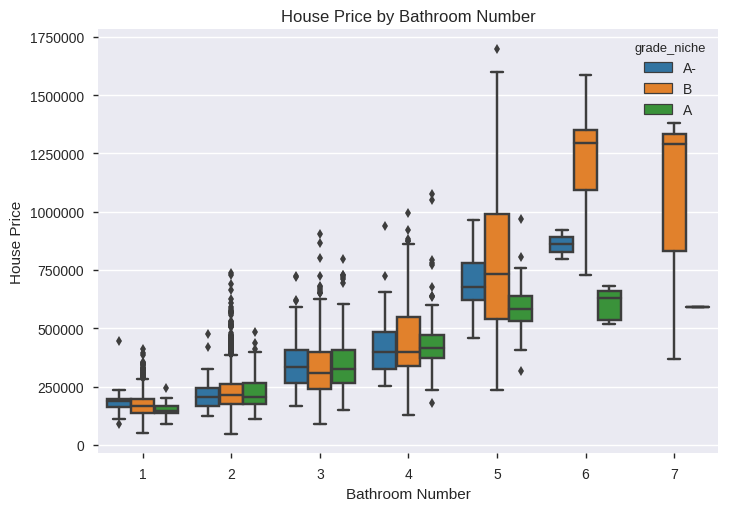

In [18]:
sns.boxplot(x='BATHSTOTAL', y='SalesClosePrice', hue='grade_niche', data=df)
plt.title("House Price by Bathroom Number")
plt.xlabel("Bathroom Number")
plt.ylabel("House Price")

Text(0,0.5,'House Price')

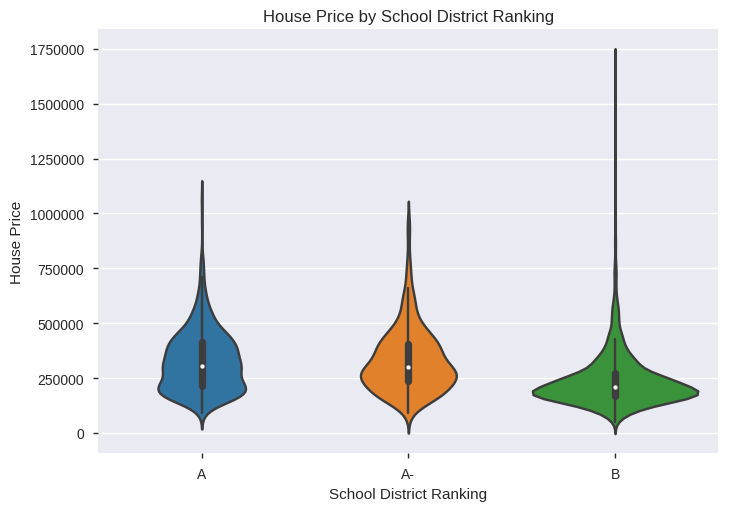

In [19]:
sns.violinplot(x='grade_niche', y='SalesClosePrice', data=df, order=['A', 'A-', 'B'])
plt.title("House Price by School District Ranking")
plt.xlabel("School District Ranking")
plt.ylabel("House Price")

Text(0,0.5,'House Price')

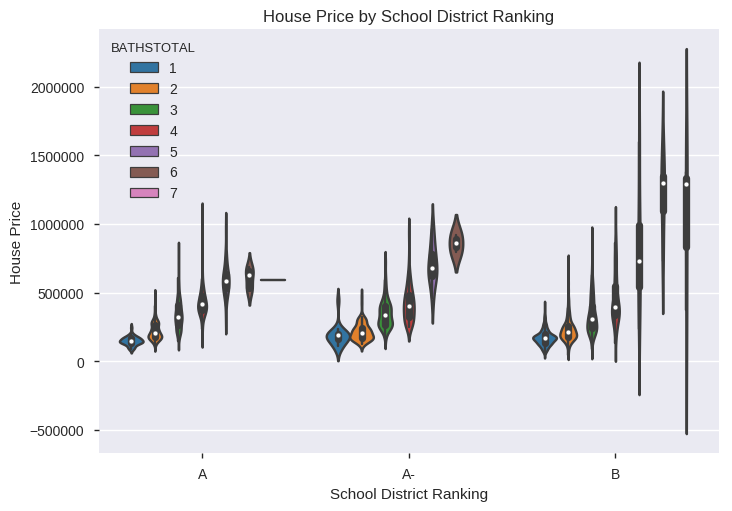

In [20]:
sns.violinplot(x='grade_niche', y='SalesClosePrice', hue='BATHSTOTAL', data=df, order=['A', 'A-', 'B'])
plt.title("House Price by School District Ranking")
plt.xlabel("School District Ranking")
plt.ylabel("House Price")

Text(0,0.5,'House Price')

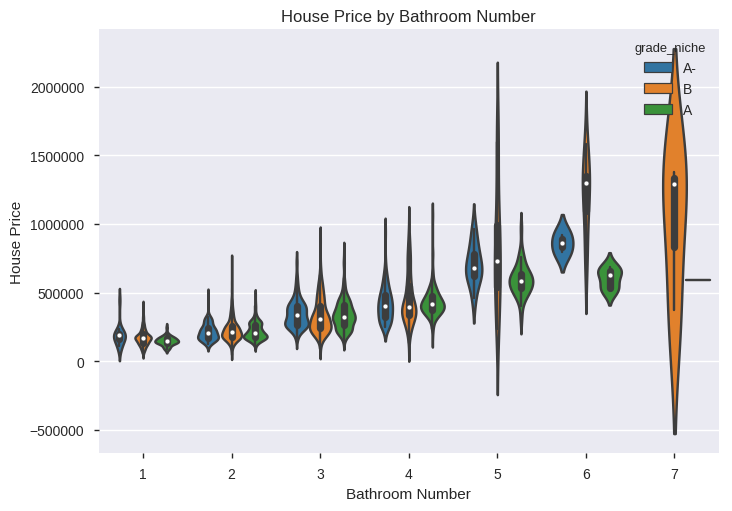

In [21]:
sns.violinplot(x='BATHSTOTAL', y='SalesClosePrice', hue='grade_niche', data=df)
plt.title("House Price by Bathroom Number")
plt.xlabel("Bathroom Number")
plt.ylabel("House Price")